# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Loading the data

In [ ]:
# Load the MNIST dataset and preprocess it
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
Y_train = Y_train.astype('int32')
Y_test = Y_test.astype('int32')

from sklearn.model_selection import train_test_split

# Split the dataset (X_train & Y_train) into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)



11490434/11490434 [==============================] - 1s 0us/step


## **Display a random sample from the dataset**

In [ ]:
# Visualize a sample from X_train (Keep in mind the images are stored as 1x784 and need to be converted to 28x28 in order to display) using a matplotlib heatmap

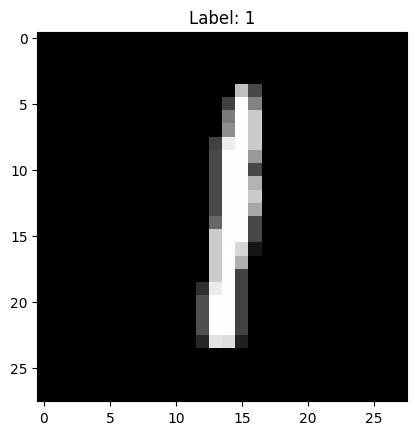

In [ ]:
import matplotlib.pyplot as plt
import random

index_to_image= random.randint(0,len(X_test)-1)

# Reshape the sample image to 28x28
sample_image = X_train[index_to_image].reshape(28, 28)

# Display the sample image using a matplotlib heatmap
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {Y_train[index_to_image]}')  # Display the corresponding label
plt.show()


# MODEL

In [ ]:
import numpy as np

# Parameters
i = 784  # Input size (no. of pixels = 28*28 = 784)
h1 = 128  # No. of nodes for 1st hidden layer
h2 = 64   # No. of nodes for 2nd hidden layer
o = 10    # Output size (no. of digits to classify)
lr = 0.01  # Learning rate
epochs = 15  # No. of epochs

# Initialize the weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(i, h1)
b1 = np.zeros((1, h1))
W2 = np.random.randn(h1, h2)
b2 = np.zeros((1, h2))
W3 = np.random.randn(h2, o)
b3 = np.zeros((1, o))

# Defining Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def one_hot(y, bs):
    one_hot_encoded = np.zeros((bs, 10))
    one_hot_encoded[np.arange(bs), y] = 1
    return one_hot_encoded

# Before we start with the training loop, let's create 2 empty lists to store the cost and accuracy values at the end of each epoch
cost_values = []
accuracy_values = []


# Training Loop
for ep in range(epochs):
    total_cost = 0
    correct_predictions = 0

    for i in range(len(X_train)):
        # Forward Propagation
        z1 = np.dot(X_train[i], W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, W3) + b3
        y_predicted = sigmoid(z3)

        # Convert label to one hot encoded vector
        y_one_hot = one_hot(Y_train[i], bs=1)

        # Calculate the cost (cross-entropy loss)
        cost = -np.sum(y_one_hot * np.log(y_predicted + 1e-10))

        # Append the cost value to the list every 200 iterations
        if i % 200 == 0:
            cost_values.append(cost)

        # Back Propagation
        dz3 = y_predicted - y_one_hot
        dW3 = np.dot(a2.T, dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)
        dz2 = np.dot(dz3, W3.T) * sigmoid_prime(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, W2.T) * sigmoid_prime(z1)
        dW1 = np.dot(X_train[i].reshape(1, -1).T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3

        total_cost += cost

        # Check accuracy
        if np.argmax(y_predicted) == Y_train[i]:
            correct_predictions += 1

    # Forward propagation for the validation set
    z1_val = np.dot(X_val, W1) + b1
    a1_val = sigmoid(z1_val)
    z2_val = np.dot(a1_val, W2) + b2
    a2_val = sigmoid(z2_val)
    z3_val = np.dot(a2_val, W3) + b3
    y_val_predicted = sigmoid(z3_val)

    # Calculate accuracy on the validation set
    accuracy_val = np.sum(np.argmax(y_val_predicted, axis=1) == Y_val) / len(Y_val)
    accuracy_values.append(accuracy_val)

    # Print results at the end of each epoch
    print(f"Epoch {ep + 1}/{epochs} - Average Cost: {total_cost / len(X_train):.4f}, Training Accuracy: {correct_predictions / len(X_train) * 100:.2f}%, Validation Accuracy: {accuracy_val * 100:.2f}%")


Epoch 1/15 - Average Cost: 0.7572, Training Accuracy: 79.63%, Validation Accuracy: 88.17%
Epoch 2/15 - Average Cost: 0.3943, Training Accuracy: 90.03%, Validation Accuracy: 91.27%
Epoch 3/15 - Average Cost: 0.3082, Training Accuracy: 92.32%, Validation Accuracy: 92.72%
Epoch 4/15 - Average Cost: 0.2594, Training Accuracy: 93.66%, Validation Accuracy: 93.20%
Epoch 5/15 - Average Cost: 0.2267, Training Accuracy: 94.48%, Validation Accuracy: 93.63%
Epoch 6/15 - Average Cost: 0.2024, Training Accuracy: 95.11%, Validation Accuracy: 93.93%
Epoch 7/15 - Average Cost: 0.1832, Training Accuracy: 95.68%, Validation Accuracy: 94.08%
Epoch 8/15 - Average Cost: 0.1674, Training Accuracy: 96.11%, Validation Accuracy: 94.48%
Epoch 9/15 - Average Cost: 0.1540, Training Accuracy: 96.47%, Validation Accuracy: 94.68%
Epoch 10/15 - Average Cost: 0.1422, Training Accuracy: 96.85%, Validation Accuracy: 94.92%
Epoch 11/15 - Average Cost: 0.1318, Training Accuracy: 97.09%, Validation Accuracy: 94.95%
Epoch 12

# Testing the model

In [ ]:
def classify(image, W1, b1, W2, b2, W3, b3):
    """
    Carry out forward propagation on input 'image' and return the predicted values of the trained model.

    Parameters:
    - image: Input image to classify.
    - W1, b1, W2, b2, W3, b3: Trained weights and biases.

    Returns:
    - predictions: Predicted values for each digit (0 to 9).
    """

    # Forward Propagation
    z1 = np.dot(image, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    predictions = sigmoid(z3)

    return predictions


In [ ]:
# Display an image from the X_test set

# Display the model's output for this image utilizing the classify function
# You can use np.argmax function to determine the most likely predicted digit according to the model.

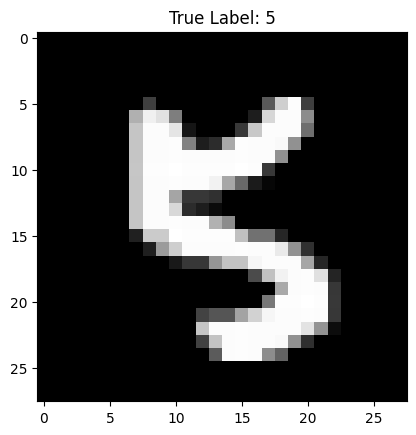

Predicted Digit: 5


In [ ]:
import matplotlib.pyplot as plt

# Choose an index from the test set to display
index_to_display = random.randint(0, len(X_test) - 1)

# Display the image
sample_image = X_test[index_to_display].reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {Y_test[index_to_display]}")
plt.show()

# Use the classify function to get model's output
image_to_classify = X_test[index_to_display]
predictions = classify(image_to_classify, W1, b1, W2, b2, W3, b3)

# Determine the most likely predicted digit
predicted_digit = np.argmax(predictions)
print(f"Predicted Digit: {predicted_digit}")


###If you're getting a good accuracy on your model (>85%) export the weights and bias matrices as numpy files, we'll need these later for custom dataset tests

In [ ]:
predictions

In [ ]:
# Initialize variables to keep track of correct predictions
correct_predictions = 0

# Iterate through all test samples
for i in range(len(X_test)):
    # Use the classify function to get model's output

    image_to_classify = X_test[i]
    predictions = classify(image_to_classify, W1, b1, W2, b2, W3, b3)

    # Determine the most likely predicted digit
    predicted_digit = np.argmax(predictions)

    # Check if the prediction is correct
    if predicted_digit == Y_test[i]:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(X_test) * 100
print(f"Accuracy on Test Set: {accuracy:.2f}%")


Accuracy on Test Set: 95.24%


In [ ]:
# Use np.save function to export the numpy arrays

In [ ]:
# Assuming you have trained your model and obtained W1, b1, W2, b2, W3, b3

# Export weights and biases as numpy files
np.save('W1.npy', W1)
np.save('b1.npy', b1)
np.save('W2.npy', W2)
np.save('b2.npy', b2)
np.save('W3.npy', W3)
np.save('b3.npy', b3)


In [ ]:
# Load weights and biases from numpy files
loaded_W1 = np.load('W1.npy')
loaded_b1 = np.load('b1.npy')
loaded_W2 = np.load('W2.npy')
loaded_b2 = np.load('b2.npy')
loaded_W3 = np.load('W3.npy')
loaded_b3 = np.load('b3.npy')
